1. Import the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Load the customer_value_analysis.csv into the variable customer_df.

In [3]:
customer_df = pd.read_csv('customer_value_analysis.csv')

3. First look at its main features (head, shape, info).

In [4]:
# Head

customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# Shape

customer_df.shape

(9134, 24)

In [6]:
# Info

customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [7]:
def rename_columns(df: pd.DataFrame) -> pd.DataFrame:
    '''
    This function picks a Pandas DataFrame and renames specific columns with lower case and underscore

    Inputs:
    df: Pandas DataFrame

    Outputs:
    A Pandas DataFrame with columns in lower case and underscores
    '''

    columns = []
    for colname in df.columns:
        columns.append(colname.lower())
            
    df.columns = columns
    df = df.rename(columns={'customer lifetime value':'customer_lifetime_value',
                            'effective to date':'effective_to_date',
                            'employmentstatus':'employment_status',
                            'location code':'location_code',
                            'marital status':'marital_status',
                                'monthly premium auto':'monthly_premium_auto',
                                'number of open complaints':'number_of_open_complaints',
                            'months since last claim':'months_since_last_claim',
                            'months since policy inception':'months_since_policy_inception',
                            'number of open complaints':'number_of_open_complaints',
                            'number of policies':'number_of_policies',
                                'policy type':'policy_type',
                            'renew office letter':'renew_office_letter',
                            'sales channel':'sales_channel',
                                'vehicle class':'vehicle_class',
                                'total claim amount':'total_claim_amount',
                            'renew offer type':'renew_offer_type',
                           'vehicle size':'vehicle_size'}, inplace=True)
        
    return df

In [8]:
rename_columns(customer_df)

5. Change the type of effective_to_date column to DateTime format.

In [9]:
customer_df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [10]:
# convert the 'Date' column to datetime format
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'], errors='coerce', format="%m/%d/%y")

In [11]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

6. Check NaN values per column.

In [12]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [13]:
# Create function to split original dataframe into two: one with numerical variables and another with categorical

def split_dataframes(df: pd.DataFrame):
    '''
    Insert one dataframe will all data and return two: one with numerical data and another only with categorical
    '''

    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(exclude=['number']).columns
    
    numerical_df = df[numerical_cols]
    categorical_df = df[categorical_cols]
    
    return numerical_df, categorical_df

In [14]:
# Name both dataframes

numerical_vars_df, categorical_vars_df = split_dataframes(customer_df)

In [15]:
# Display dataframes

#display(categorical_vars_df)
display(numerical_vars_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


8. Drop any ID column.

In [16]:
# Drop the customer column as it represents an ID one

categorical_vars_df.drop(['customer'], axis=1, inplace=True)
display(categorical_vars_df)

/var/folders/qs/x8zhfsxx1635k24vswp2rjq80000gn/T/ipykernel_18881/3969656324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_vars_df.drop(['customer'], axis=1, inplace=True)


,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

In [17]:
# Create the correlation matrix

numerical = numerical_vars_df
correlation_matrix = numerical.corr()
correlation_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


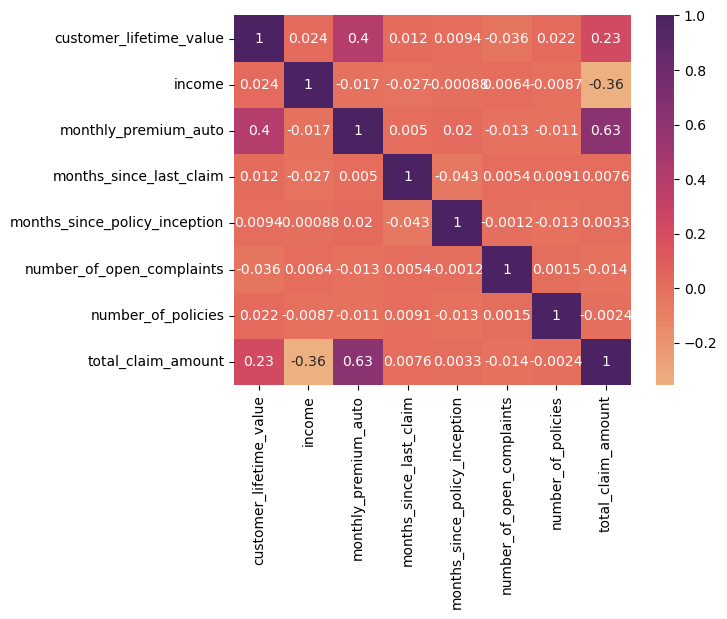

In [18]:
# Create a heatmap in order to visualize the correlations in a better way

cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap((correlation_matrix), annot=True, cmap=cmap)
plt.show()

# monthly_premium_auto and total_claim_amount have the highest correlation. It makes sense because the 
# more you pay monthly for your auto insurance, the more you can claim in case of a damage or acccident.

10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [19]:
# Review unique values for numerical columns

numerical_vars_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [20]:
# Create function to split original numerical dataframe into two: one with discrete variables and another with continuous

def split_numerical_dataframes(df: pd.DataFrame, threshold = 36):
    '''
    Insert one numerical dataframe and return two: one with discrete variables and another one with continuous
    '''
    
    continuous_cols = df.columns[df.nunique() > threshold]
    discrete_cols = df.columns[df.nunique() <= threshold]

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df

In [21]:
# Name both dataframes

continuous_df, discrete_df = split_numerical_dataframes(numerical_vars_df)

In [41]:
# Display both dataframes

display(continuous_df)
#display(discrete_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

In [38]:
# Logic used before creating the function

#fig, ax = plt.subplots(1,3, figsize=(16,16))

#sns.histplot(x="months_since_last_claim", data = discrete_df, ax = ax[0]);
#ax[0].set_ylim((0,1000))

#sns.histplot(x="number_of_open_complaints", data = discrete_df, ax = ax[1]);
#ax[1].set_ylim((0,10000))

#sns.histplot(x="number_of_policies", data = discrete_df, ax = ax[2]);
#ax[2].set_ylim((0,3500))

In [53]:
# Create the function

def create_barplots(df: pd.DataFrame):
    '''
    This function creates barplots for all the columns in a dataframe that only has discrete variables
    '''

    columns_to_plot = df.columns
    num_columns = len(columns_to_plot)

    fig, ax = plt.subplots(1, num_columns, figsize=(16, 16))

    for i, column in enumerate(columns_to_plot):
        sns.histplot(x=column, data=df, ax=ax[i])
        #ax[i].set_ylim(0, 8000)

    plt.tight_layout()
    plt.show()

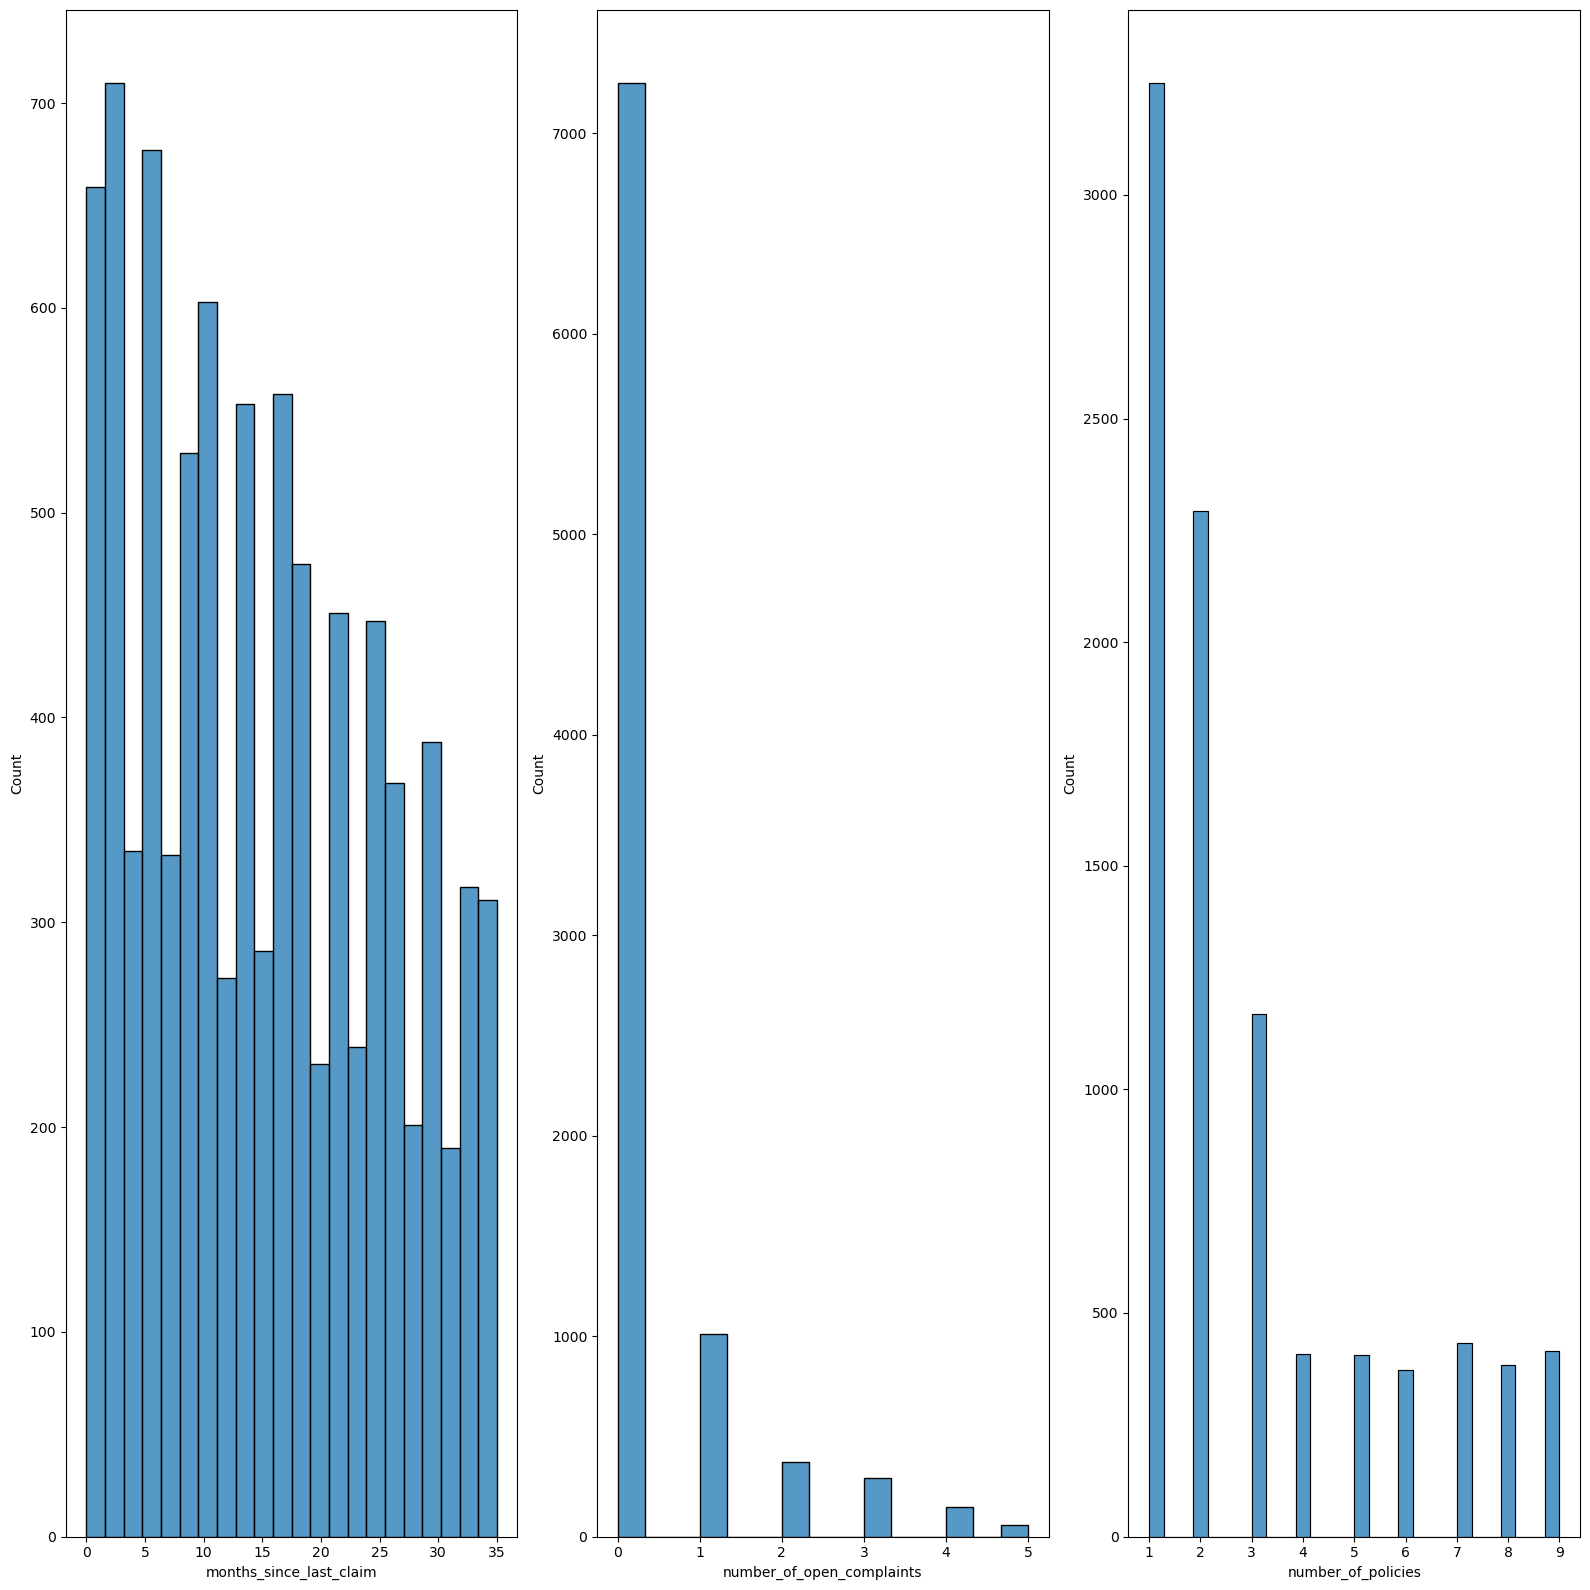

In [54]:
# Execute the function

create_barplots(discrete_df)

12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

In [52]:
# Logic used before creating the function

#fig, ax = plt.subplots(1,5, figsize=(16,16))

#sns.histplot(continuous_df, x = "customer_lifetime_value", bins=50, ax=ax[0])
#sns.histplot(continuous_df, x = "income", bins=50, ax=ax[1])
#sns.histplot(continuous_df, x = "monthly_premium_auto", bins=50, ax=ax[2])
#sns.histplot(continuous_df, x = "months_since_policy_inception", bins=50, ax=ax[3])
#sns.histplot(continuous_df, x = "total_claim_amount", bins=50, ax=ax[4])

In [50]:
# Create the function

def create_histograms(df: pd.DataFrame):
    '''
    This function histograms for all the columns in a dataframe that only has continuous variables
    '''

    columns_to_plot = df.columns
    num_columns = len(columns_to_plot)

    fig, ax = plt.subplots(1, num_columns, figsize=(16, 16))

    for i, column in enumerate(columns_to_plot):
        sns.histplot(df, x = column, bins=50, ax=ax[i])

    plt.tight_layout()
    plt.show()

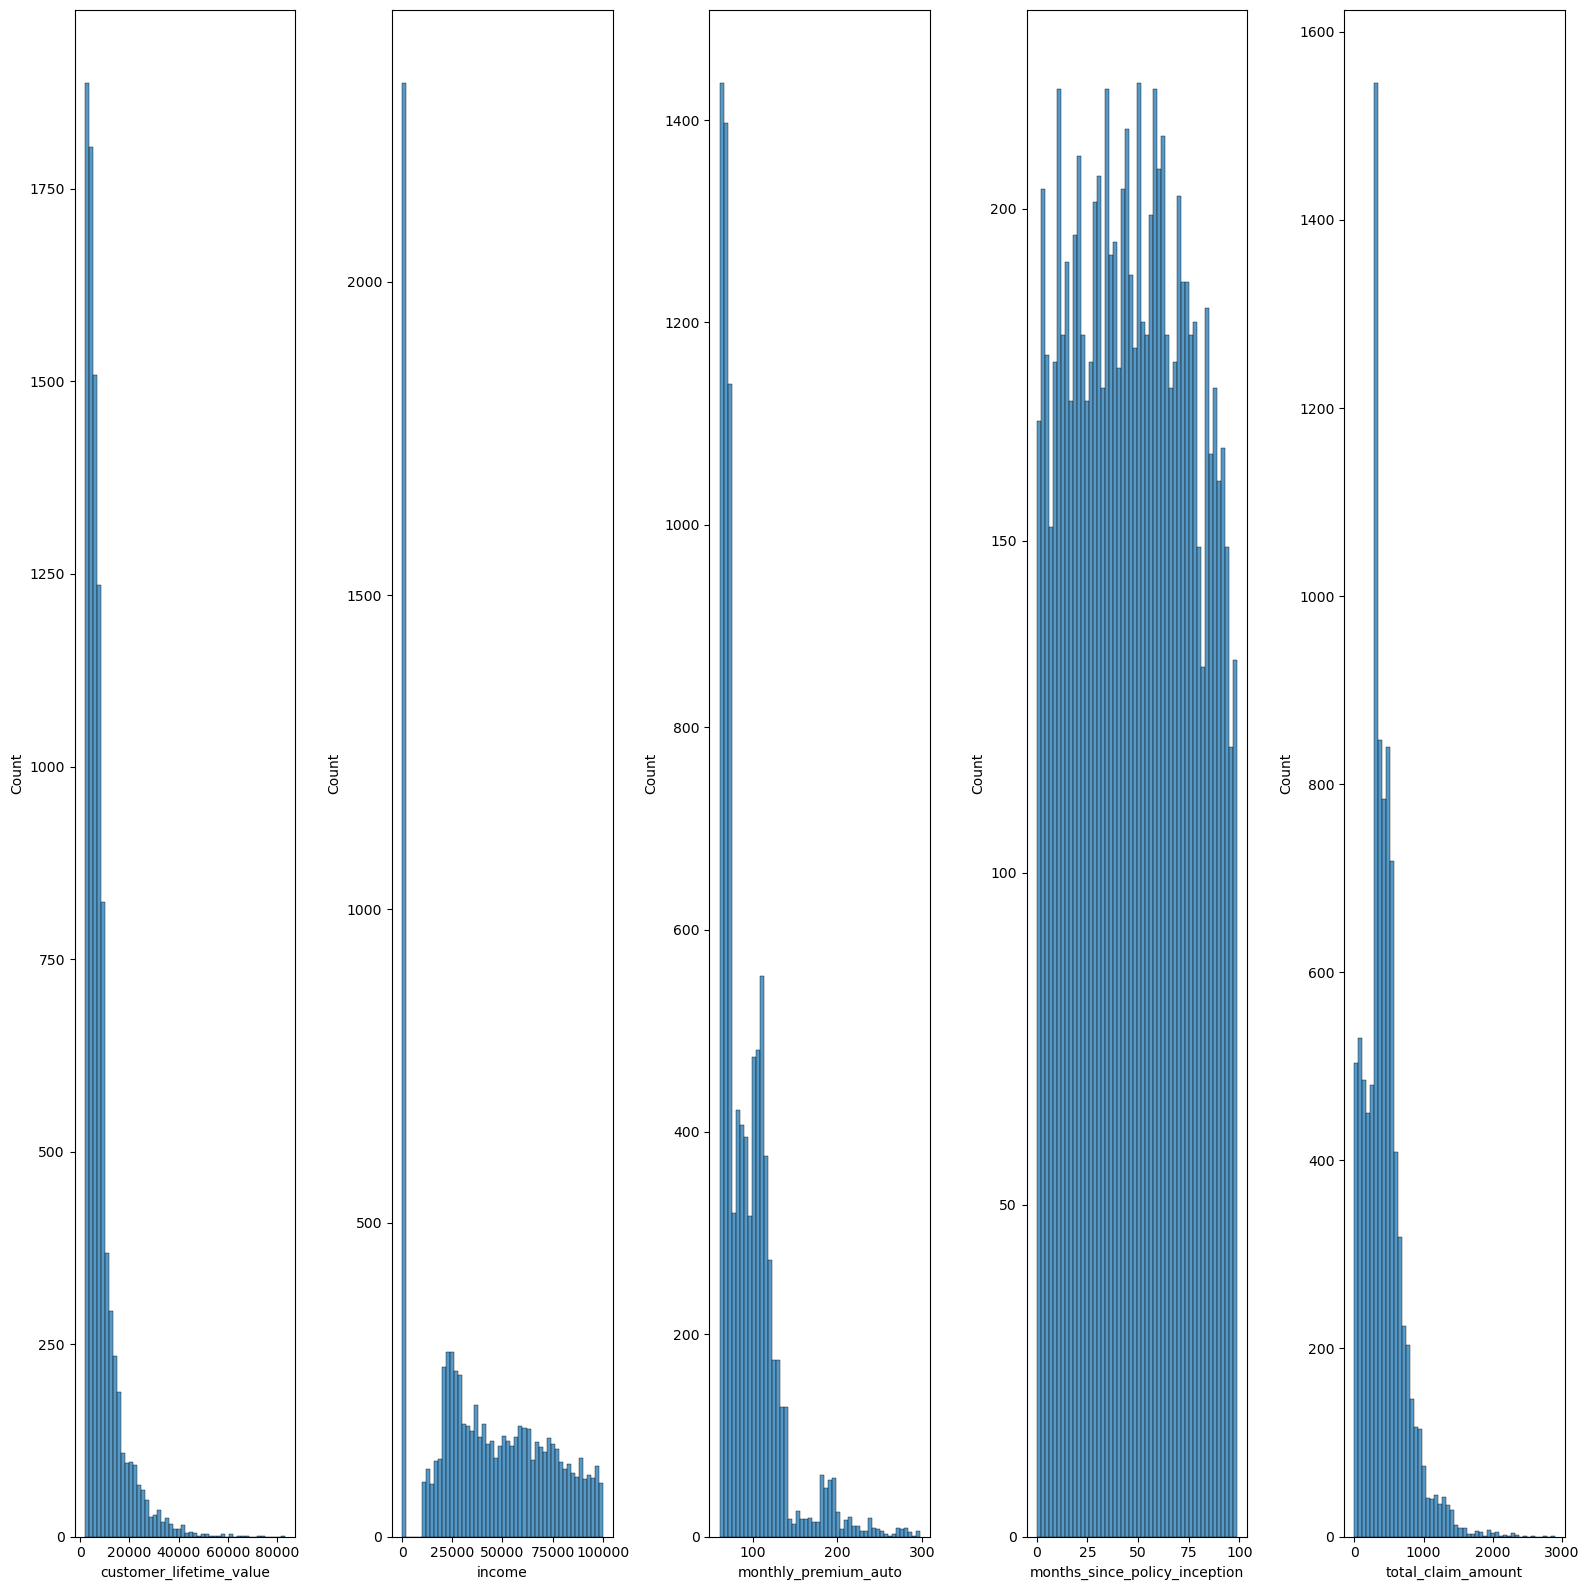

In [51]:
create_histograms(continuous_df)

13. According to the previous histogram plots, do you think that you will have to apply any transformation?

In [55]:
# From the previous histogram plots (and the data visualize in the continuous_df) we could say that applying 
# a transformation for those columns would be beneficial in order to have all column values in the same range.
# Let's do this with a MinMaxScaler()

In [57]:
# Let's transform the dataframe and create a new one named continuous_df_scaled

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

continuous_df_scaled = pd.DataFrame(scaler.fit_transform(continuous_df), columns=continuous_df.columns)
display(continuous_df_scaled)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,0.010629,0.562847,0.033755,0.050505,0.132974
1,0.062406,0.000000,0.139241,0.424242,0.391051
2,0.134960,0.487763,0.198312,0.383838,0.195764
3,0.070589,0.000000,0.189873,0.656566,0.183117
4,0.011245,0.438443,0.050633,0.444444,0.047710
...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.898990,0.068485
9130,0.014719,0.216081,0.075949,0.282828,0.131034
9131,0.076951,0.000000,0.101266,0.373737,0.273297
9132,0.069098,0.219452,0.147679,0.030303,0.238876


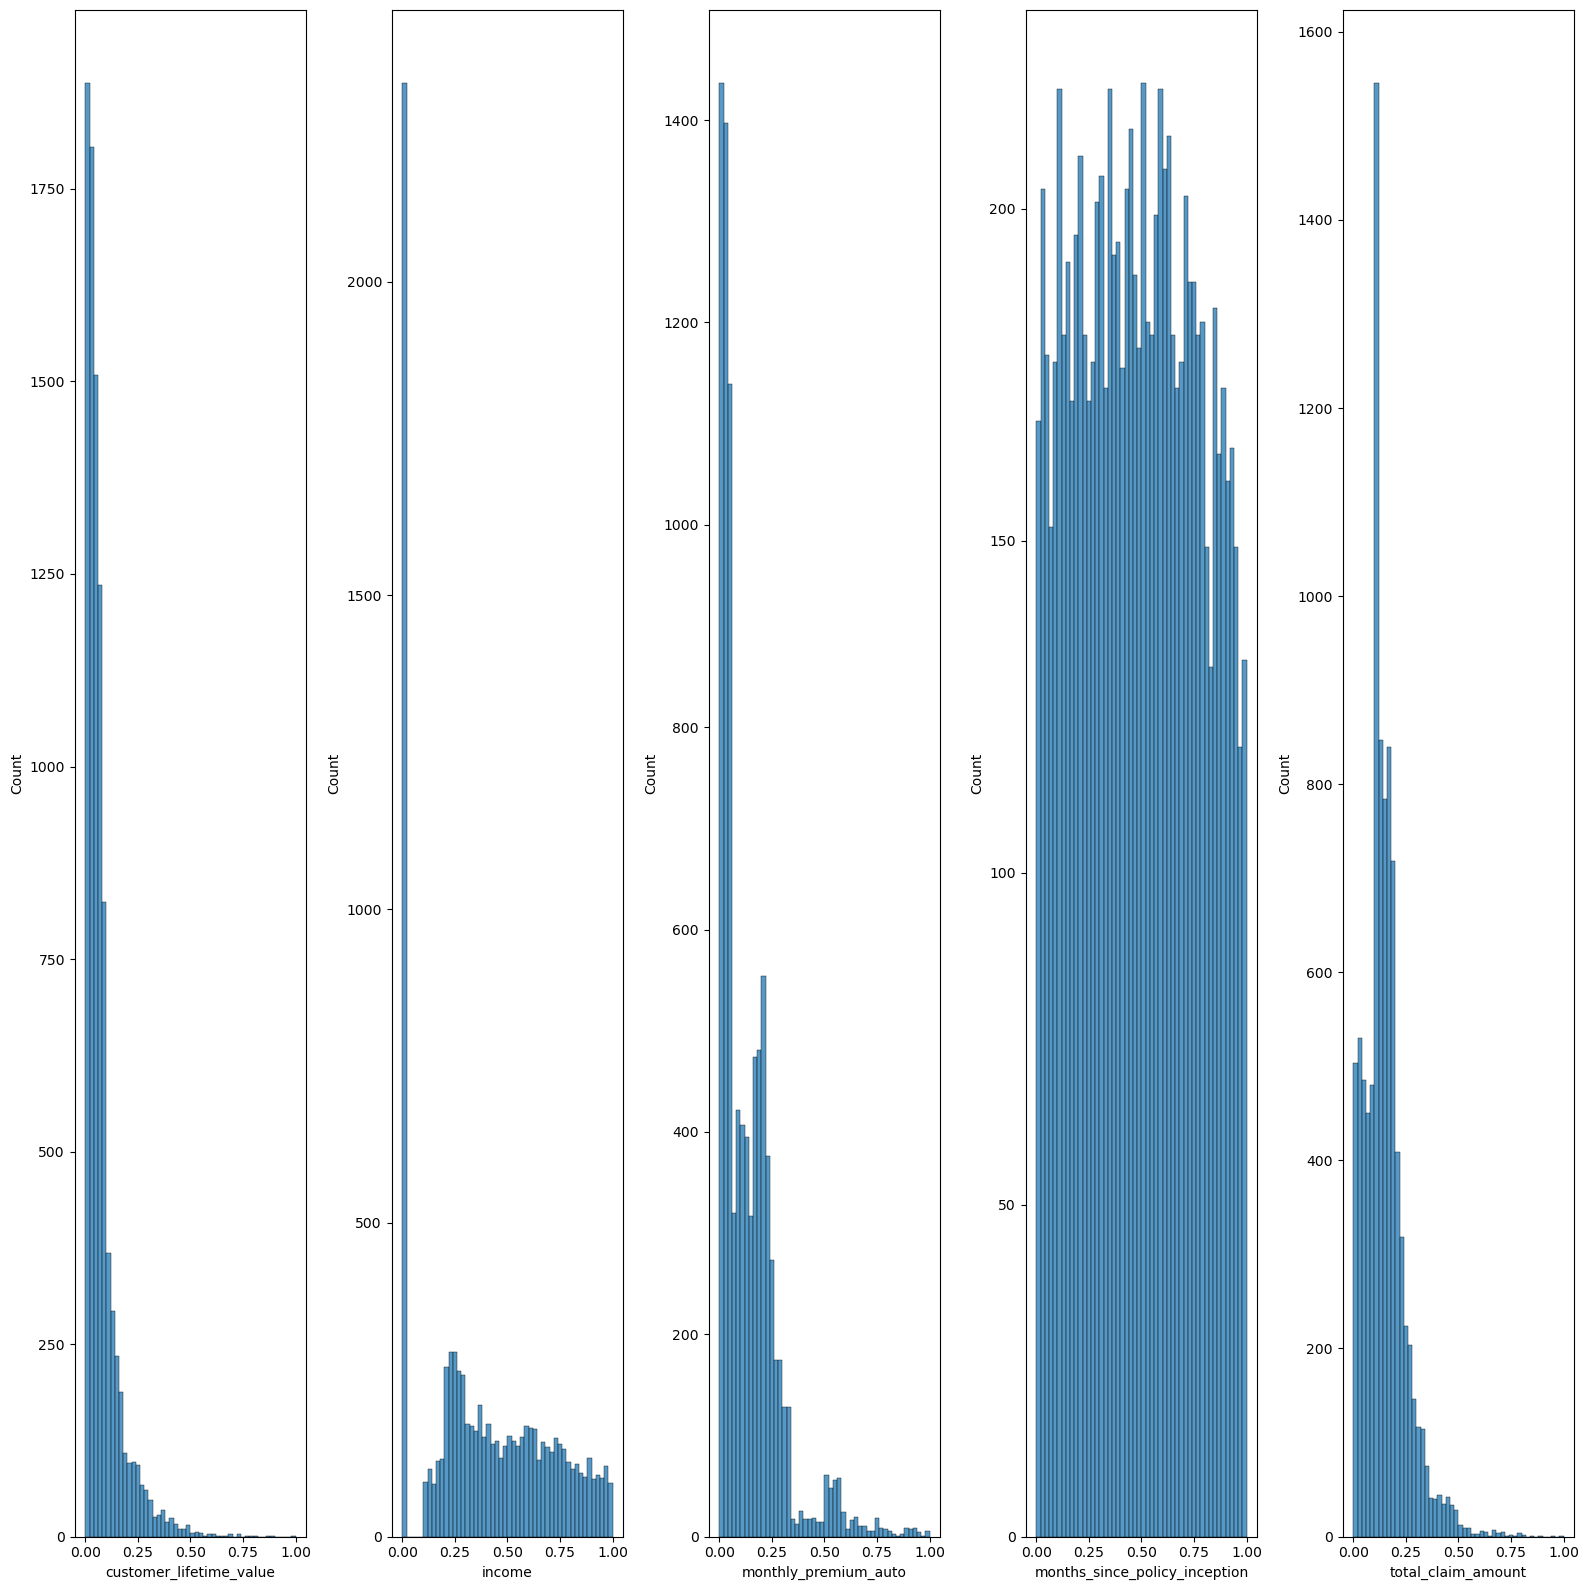

In [59]:
# Apply function on continuous_df_scaled

create_histograms(continuous_df_scaled)

# The distribution of the histograms is pretty much the same but now we have the x axis in the same scale among all the variables


14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [86]:
# Logic used before creating the function

#outliers_columns = continuous_df_scaled.columns

#fig, axes = plt.subplots(5, 1, figsize=(10,16))

#for i, col in enumerate(outliers_columns):
    #sns.boxplot(x=continuous_df_scaled[col], ax=axes[i])
    #axes[i].set_title(col, fontsize=10) 

#plt.subplots_adjust(hspace=1)      
    
#plt.show()

In [83]:
def create_boxplots(df: pd.DataFrame):
    '''
    This function boxplots for all the columns in a dataframe that only has continuous variables
    '''

    outliers_columns = df.columns

    fig, axes = plt.subplots(5, 1, figsize=(10,16))

    for i, col in enumerate(outliers_columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col, fontsize=10) 

    plt.subplots_adjust(hspace=1)      
    
    plt.show()

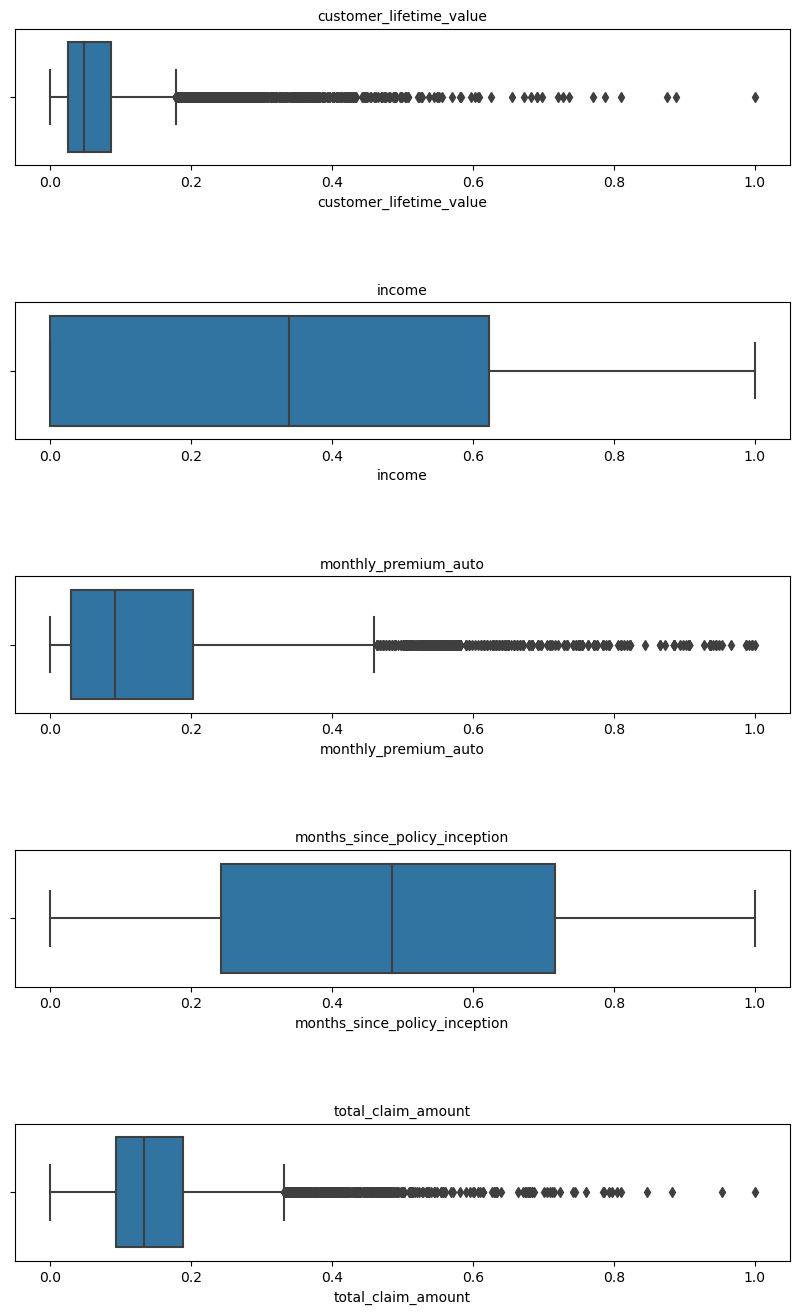

In [84]:
create_boxplots(continuous_df_scaled)